In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seven/download.png
/kaggle/input/five-dataset/images (1).png


# DEPENDENCIES

In [141]:
!pip install tensorflow

In [142]:
!pip install opencv-python

In [143]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import torch

# DATA PREPARING

In [144]:
mnist_data = tf.keras.datasets.mnist

In [145]:
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

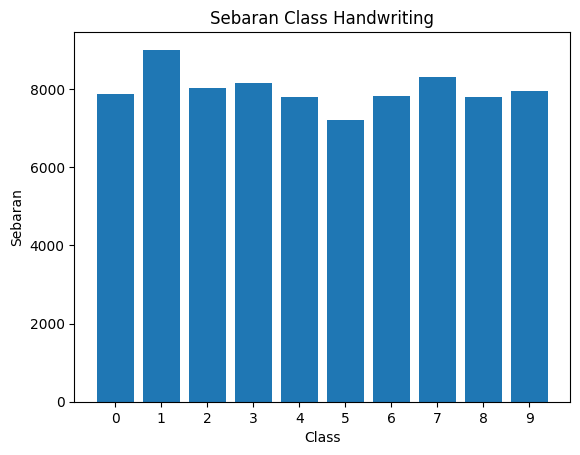

In [146]:
label = (list(y1)+list(y2))
label = pd.DataFrame(label)
index = [i[0] for i in label.value_counts().index]
plt.bar(index, label.value_counts().values)
plt.xticks(index)
plt.xlabel("Class")
plt.ylabel("Sebaran")
plt.title("Sebaran Class Handwriting")
plt.show()

In [147]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [148]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [149]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# BUILDING MODEL

In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [152]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [153]:
history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1583 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.006

# EVALUATION

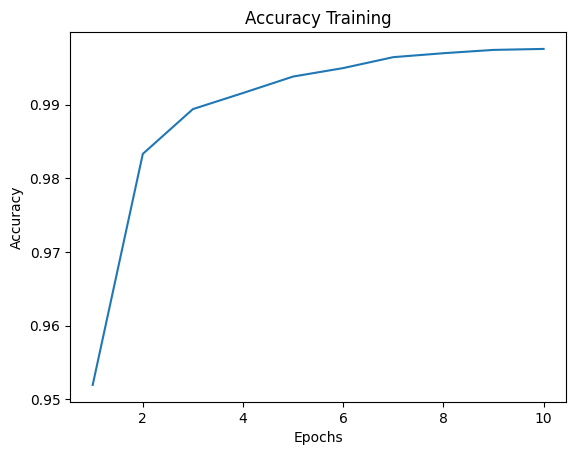

In [154]:
plt.title("Accuracy Training")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot( np.arange(1,11), history.history['accuracy'])

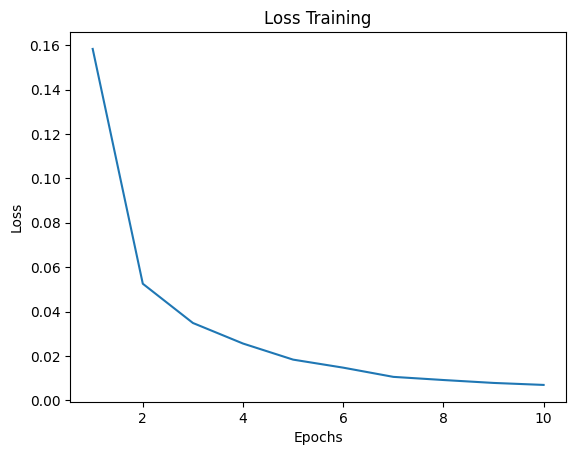

In [155]:
plt.title("Loss Training")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot( np.arange(1,11), history.history['loss'])

In [156]:
model.save("handriwtting_conv.model")

In [157]:
model = tf.keras.models.load_model("handriwtting_conv.model")

In [158]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9909
0.03713436424732208
0.9908999800682068


**Confussion Matrix Training Data**

1875/1875 [==============================] - 3s 2ms/step


<Axes: title={'center': 'Confussion Matrix Data Training'}>

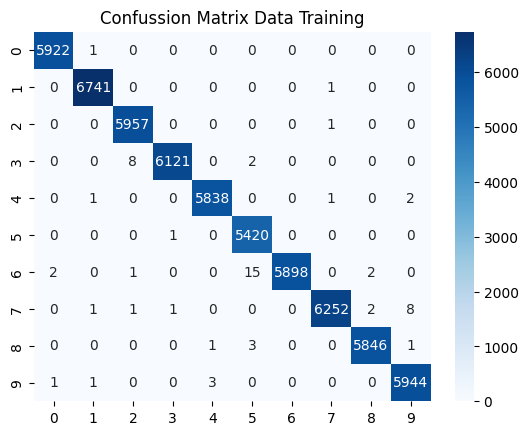

In [159]:
y_pred = model.predict(x_train)
y_pred_class = np.argmax(y_pred, axis = 1)
confussion = confusion_matrix(y_train, y_pred_class)
plt.title("Confussion Matrix Data Training")
sns.heatmap(confussion, annot=True, fmt='d', cmap='Blues')

**Confussion Matrix Testing Data**

313/313 [==============================] - 1s 2ms/step


<Axes: title={'center': 'Confussion Matrix Data Testing'}>

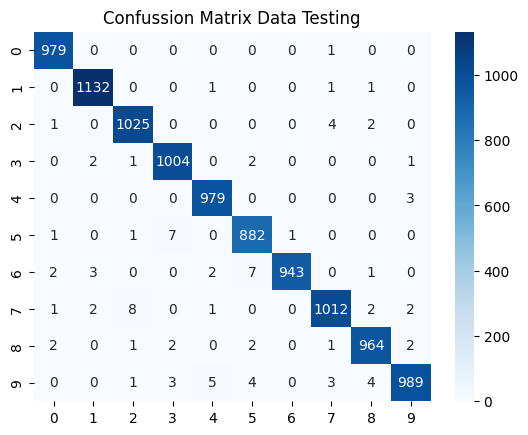

In [160]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis = 1)
confussion = confusion_matrix(y_test, y_pred_class)
plt.title("Confussion Matrix Data Testing")
sns.heatmap(confussion, annot=True, fmt='d', cmap='Blues')

# PREDICTION

1/1 [==============================] - 0s 19ms/step
Confidence Every Output Neuron: 
[[2.2543308e-18 8.7836873e-17 4.1146587e-20 1.0014669e-13 2.5776617e-18
  1.0000000e+00 3.2320391e-18 5.5038942e-11 8.3297618e-15 5.4816451e-10]]


Hasil prediksi:  5




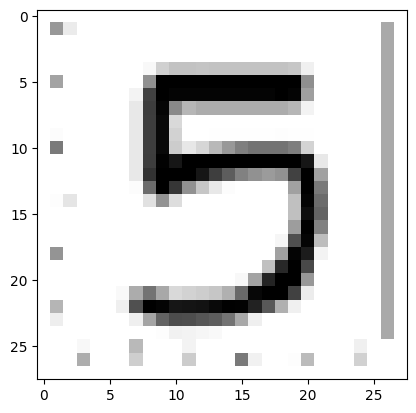

In [167]:
images = cv2.imread("/kaggle/input/five-dataset/images (1).png")[:,:,0]
images = cv2.resize(images, (28,28))
img = np.invert(np.array([images]))
img = tf.keras.utils.normalize(img, axis = 1)
predict = model.predict(img)
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
plt.imshow(images)
print("Confidence Every Output Neuron: ")
print(predict)
print("\n=============================================\n")
print("Hasil prediksi: ", np.argmax(predict))
print("\n=============================================\n")